In [3]:
import torch
import torchvision
import numpy as np
from PIL import Image
import json
import numpy as np 
import math
import matplotlib.pyplot as plt 

json_path = './annotations/mpii/fullannotations.json'
joint_path = './annotations/mpii/jointdict.json'
histogram_path = './annotations/mpii/histogram.json'
images_path = './images/mpii_resized'
mapp_path = './images/mpii_map'

with open(histogram_path, 'r') as fp:
    joint_histogram = json.load(fp)

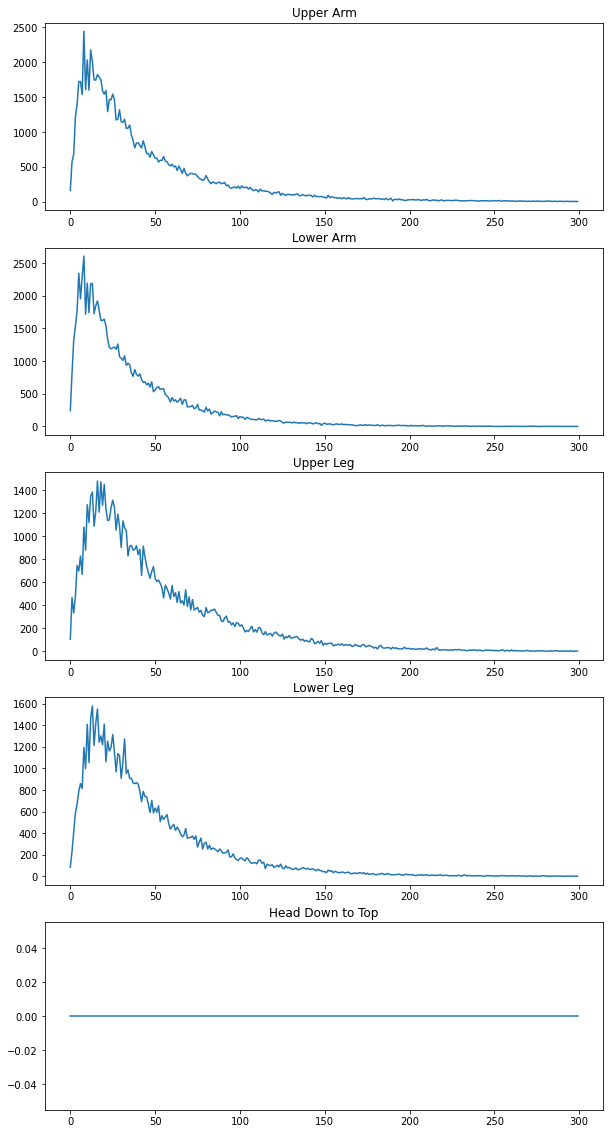

In [7]:


end = 300

plt.figure(figsize=(10, 20))
plt.subplot(5, 1, 1); plt.plot(joint_histogram['u_arm'][:end]); plt.title('Upper Arm')
plt.subplot(5, 1, 2); plt.plot(joint_histogram['l_arm'][:end]); plt.title('Lower Arm')
plt.subplot(5, 1, 3); plt.plot(joint_histogram['u_leg'][:end]); plt.title('Upper Leg')
plt.subplot(5, 1, 4); plt.plot(joint_histogram['l_leg'][:end]); plt.title('Lower Leg')
plt.subplot(5, 1, 5); plt.plot(joint_histogram['head'][:end]); plt.title('Head Down to Top')
plt.show()

In [1]:
import process.test_mpii_annot

076161962.jpg


FileNotFoundError: [Errno 2] No such file or directory: './images/mpii_resized/076161962.jpg'